# DATA

## **Các bạn dùng link này lấy data để hoàn thành HW nhé:** https://drive.google.com/file/d/1YEP-CT4KTPzqDBbQeWDtsCI9uqaxRDFK/view?usp=sharing

## HW1

### HW1.1 

p-norm của một vector $v=(v_1, v_2, ..., v_n), v \in R^n $ được định nghĩa như sau $||v||_p = \sqrt[p]{v_1^p + v_2^p + ... + v_n^p}$. Viết function nhận 2 giá trị vector và p để trả về giá trị p-norm tương ứng. (Khi p=2, còn được gọi là Euclidean norm) **(Không dùng hàm nump.linalg.norm)**

vd: 


```python
v = [1, 2, 3, 3, 1 ]
p = 3
norm(v,p)
>> 4.0
```



In [11]:
norm = lambda v, p: sum([vi ** p for vi in v]) ** (1/p)

In [12]:
v = [1, 2, 3, 3, 1 ]
p = 3

In [13]:
norm(v, p)

3.9999999999999996

### HW1.2
Viết đoạn code tìm giá trị a,b,c,d trong hệ phương trình dưới đây **(không sử dụng np.linalg.lstsq)**:

$
\begin{align}
3a + 4b - 5c + d &= 10\\
2a + 2b + 2c - d &= 5\\
a -b + 5c - 5d &= 7\\
5a + d &= 4
\end{align}
$

In [14]:
import numpy as np

A = np.array([[3, 4, -5, 1], [2, 2, 2, -1], [1, -1, 5, -5], [5, 0, 0, 1]])
A = A.astype('float')
b = np.array([10, 5, 7, 4])

x = np.linalg.inv(A.T@A)@A.T@b



print(A)
print(b)
print(x)

print(A@x)

[[ 3.  4. -5.  1.]
 [ 2.  2.  2. -1.]
 [ 1. -1.  5. -5.]
 [ 5.  0.  0.  1.]]
[10  5  7  4]
[ 1.24778761  1.01769912 -0.88495575 -2.23893805]
[10.  5.  7.  4.]


### HW1.3: 
Tìm hiểu về transformation matrix. Áp dụng cho ảnh 2D.
- Tìm matrix A có thể giúp cho xoay ảnh mọi góc $\theta$ trong range [-360, 360]
- Viết function xoay ảnh, nhận input là ảnh và góc xoay $\theta$. Trả về ouput là ảnh đã xoay theo góc $\theta$

Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

Yêu cầu 2 **(*)** (Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

VD: rotate(img, 45)


VD output của Yêu cầu 1 khi xoay ảnh 45 độ 

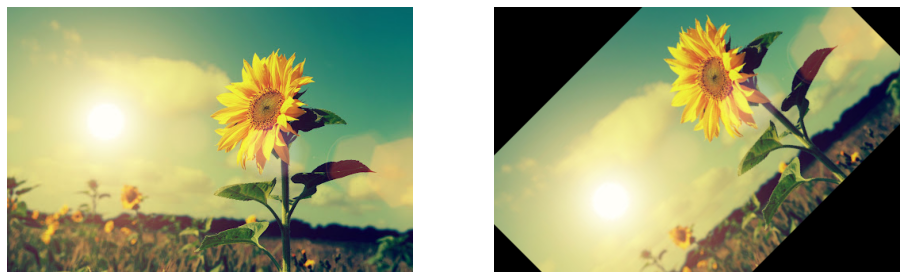

VD output của Yêu cầu 2 khi xoay ảnh 45 độ 

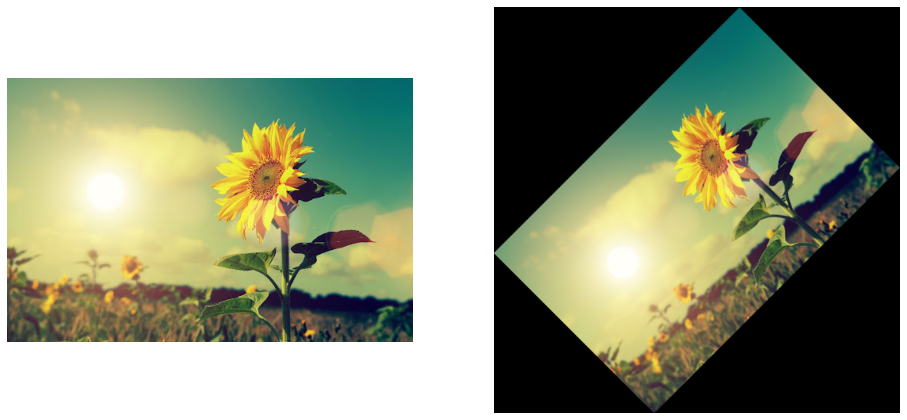

In [31]:
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive/')
hw1_3_path = '/content/drive/My Drive/Colab Notebooks/AI4O/Exercise8_Data/Exercise8_Data/HW1.3/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


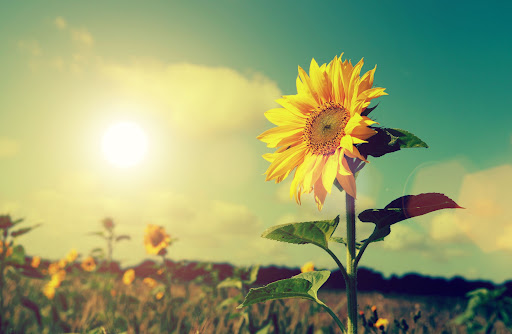

In [39]:
# print(hw1_3_path + 'sub.jpg')
sun = cv2.imread(hw1_3_path + 'sun.jpg', 1)
cv2_imshow(sun)

Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)


In [74]:
import numpy as np
import cv2

def angle_to_rad(angle):
  return angle * np.pi / float(180)

In [120]:
def three_shears(angle, xy_mat):
  neg_angle = angle
  shear_mat1 = np.array([[1, -np.tan(neg_angle / 2)], [0, 1]])
  shear_mat2 = np.array([[1, 0], [np.sin(neg_angle), 1]])
  shear_mat3 = shear_mat1

  new_xy = np.dot(shear_mat1, xy_mat)
  new_xy = new_xy.astype(np.int64)

  new_xy = np.dot(shear_mat2, xy_mat)
  new_xy = new_xy.astype(np.int64)

  new_xy = np.dot(shear_mat3, xy_mat)
  new_xy = new_xy.astype(np.int64)

  return new_xy

In [121]:
def rotate(img, rotate_angle, pivot_point, img_shape):
  #pivot_point: tọa độ xoay ảnh

  h, w = img_shape
  pivot_point_x, pivot_point_y = pivot_point

  new_img = np.zeros(img.shape, dtype='uint8')

  for p_height in range(h):
    for p_width in range(w):
      xy_mat = np.array([[p_width - pivot_point_x], [p_height - pivot_point_y]])

      rotate_pos = three_shears(rotate_angle, xy_mat)

      new_x = pivot_point_x + int(rotate_pos[0])
      new_y = pivot_point_y + int(rotate_pos[1])

      if (0 <= new_x <= w-1) and (0 <= new_y <= h-1):
        new_img[new_y, new_x] = img[p_height, p_width]
  
  return new_img

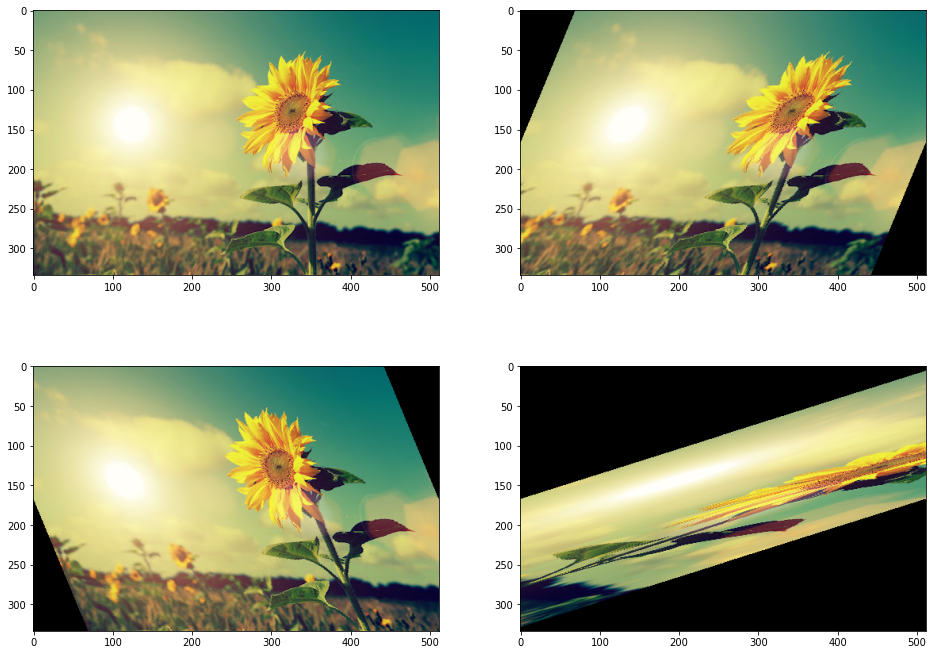

In [122]:
import matplotlib.pyplot as plt

rot_img = rotate(sun, angle_to_rad(45), (sun.shape[1]//2, sun.shape[0]//2, ), sun.shape[:2])
rot_img2 = rotate(sun, angle_to_rad(-45), (sun.shape[1]//2, sun.shape[0]//2, ), sun.shape[:2])
rot_img3 = rotate(sun, angle_to_rad(145), (sun.shape[1]//2, sun.shape[0]//2, ), sun.shape[:2])

fig = plt.figure(figsize = (16, 12))
fig.add_subplot(2, 2, 1)
plt.imshow(sun[...,::-1])

fig.add_subplot(2, 2, 2)
plt.imshow(rot_img[...,::-1])

fig.add_subplot(2, 2, 3)
plt.imshow(rot_img2[...,::-1])

fig.add_subplot(2, 2, 4)
plt.imshow(rot_img3[...,::-1])

plt.show()

In [92]:
def rotate_w_bound(img, rotate_angle, pivot_point, img_shape):
  #pivot_point: tọa độ xoay ảnh
  rotate_mat = np.array(
      [
       [np.cos(rotate_angle), -np.sin(rotate_angle)],
       [np.sin(rotate_angle), np.cos(rotate_angle)],
      ]
  )

  h, w = img_shape
  pivot_point_x, pivot_point_y = pivot_point

  new_img = np.zeros(img.shape, dtype='uint8')

  for p_height in range(h):
    for p_width in range(w):
      xy_mat = np.array([[p_width - pivot_point_x], [p_height - pivot_point_y]])

      rotate_pos = np.dot(rotate_mat, xy_mat)

      new_x = pivot_point_x + int(rotate_pos[0])
      new_y = pivot_point_y + int(rotate_pos[1])

      if (0 <= new_x <= w-1) and (0 <= new_y <= h-1):
        new_img[new_y, new_x] = img[p_height, p_width]
  
  return new_img

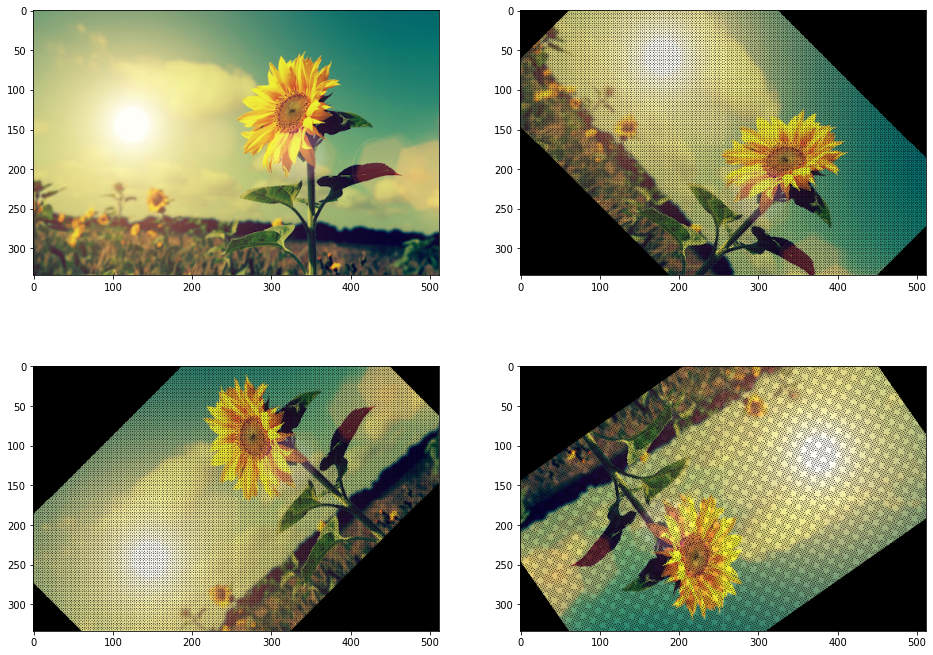

In [93]:
import matplotlib.pyplot as plt

rot_img = rotate_w_bound(sun, angle_to_rad(45), (sun.shape[1]//2, sun.shape[0]//2, ), sun.shape[:2])
rot_img2 = rotate_w_bound(sun, angle_to_rad(-45), (sun.shape[1]//2, sun.shape[0]//2, ), sun.shape[:2])
rot_img3 = rotate_w_bound(sun, angle_to_rad(145), (sun.shape[1]//2, sun.shape[0]//2, ), sun.shape[:2])

fig = plt.figure(figsize = (16, 12))
fig.add_subplot(2, 2, 1)
plt.imshow(sun[...,::-1])

fig.add_subplot(2, 2, 2)
plt.imshow(rot_img[...,::-1])

fig.add_subplot(2, 2, 3)
plt.imshow(rot_img2[...,::-1])

fig.add_subplot(2, 2, 4)
plt.imshow(rot_img3[...,::-1])

plt.show()

Yêu cầu 2 **(*)** (Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)


In [117]:
def rotate_wloss_info(img, angle):
  (h, w) = img.shape[:2]
  (cX, cY) = (w // 2, h // 2)

  m = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

  cos = np.abs(m[0, 0])
  sin = np.abs(m[0, 1])

  nW = int((h * sin) + (w * cos))
  nH = int((h * cos) + (w * sin))

  m[0, 2] += (nW/2) - cX
  m[1, 2] += (nH/2) - cY

  return cv2.warpAffine(img, m, (nW, nH))

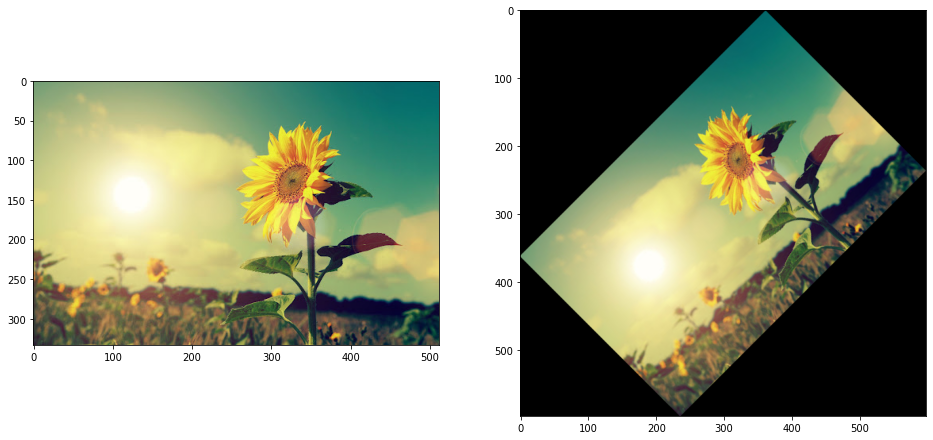

In [119]:
rot_img = rotate_wloss_info(sun, 45)
fig = plt.figure(figsize = (16, 12))
fig.add_subplot(1, 2, 1)
plt.imshow(sun[...,::-1])

fig.add_subplot(1, 2, 2)
plt.imshow(rot_img[...,::-1])



plt.show()

## HW2

Viết chương trình sử dụng kỹ thuật background substraction để trích xuất forgeground (object mong muốn) và dán vào background mới. 

- Input: 3 ảnh **Background 1**, **Background 2**, **Observed image**

- Output: là ảnh mới khi trích xuất object từ **Observed image** và dán vào **Background 2**

- **Gợi Ý:**
    - Đưa cả 3 ảnh về cùng kích thước
    - Dùng background substraction với **Observed image** và **Background 1** để lấy mask object (object ở đây là người MC mặc áo đỏ)
    - Mask object là ảnh binary (Foreground Mask) sẽ gồm 2 giá trị: 0 là background, 1 các vùng pixel chứa object.
    - Tạo ra ảnh output (New image) vị trí pixel nào = 1 thì lấy giá trị của **Observed image** và vị trí nào = 0 thì lấy giá trị của **Background 2**

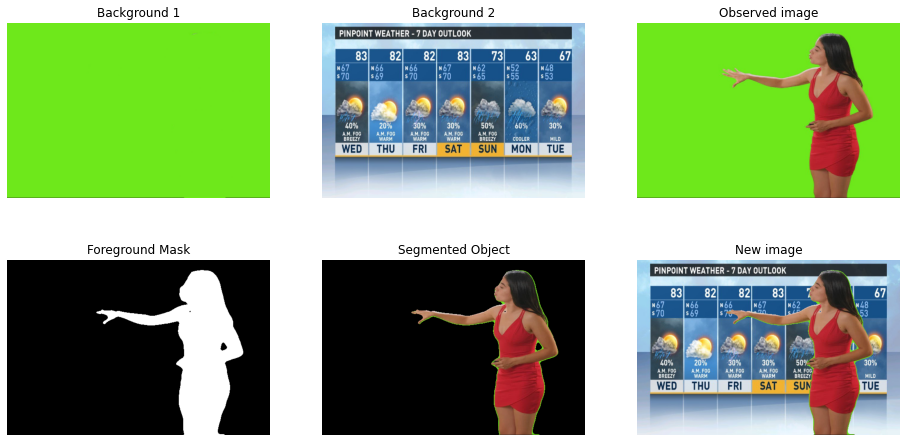

In [98]:
from google.colab import drive

drive.mount('/content/drive/')
base_path = '/content/drive/My Drive/Colab Notebooks/AI4O/Exercise8_Data/Exercise8_Data/HW2/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


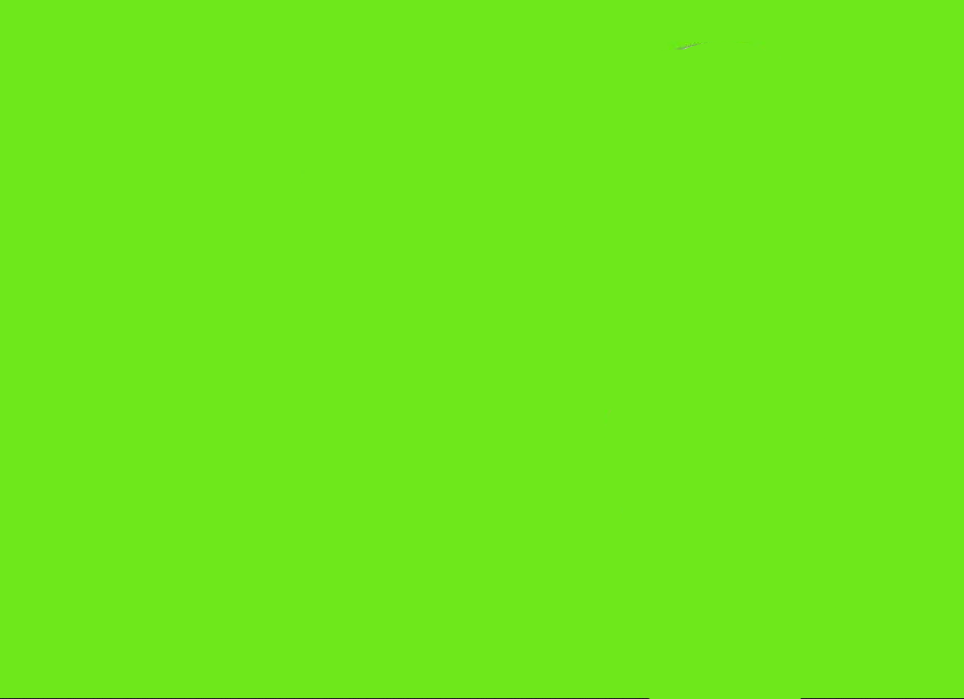

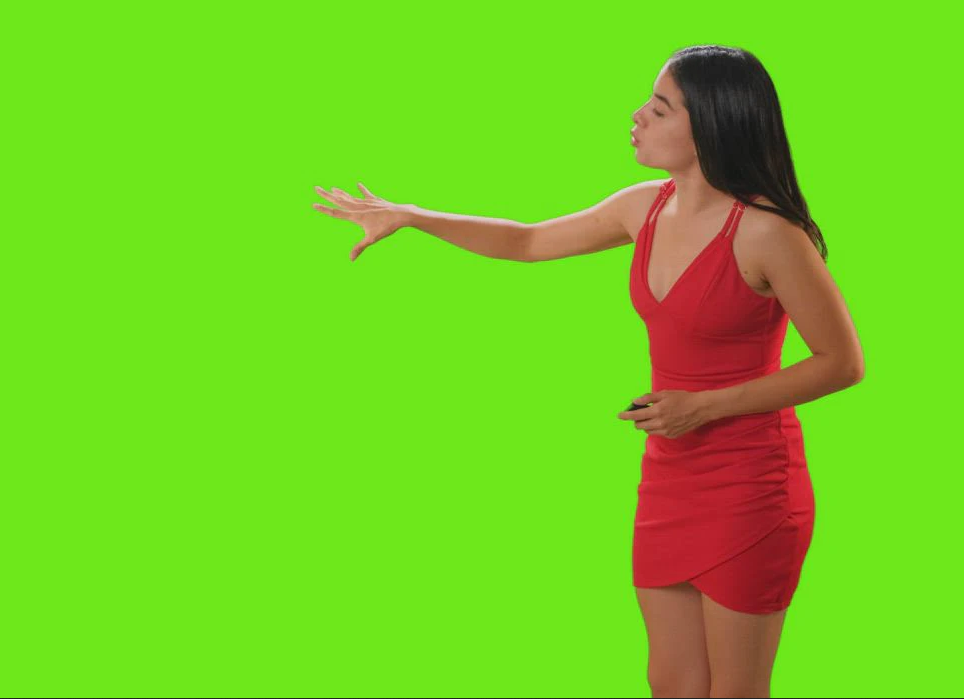

In [99]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

bg = cv2.imread(base_path + 'background4.png', 1)
# bg = cv2.resize(bg, (640, 480))

img = cv2.imread(base_path + 'pg4.png', 1)
# img = cv2.resize(img, (640, 480))

cv2_imshow(bg)
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(699, 964, 3)
(699, 964)


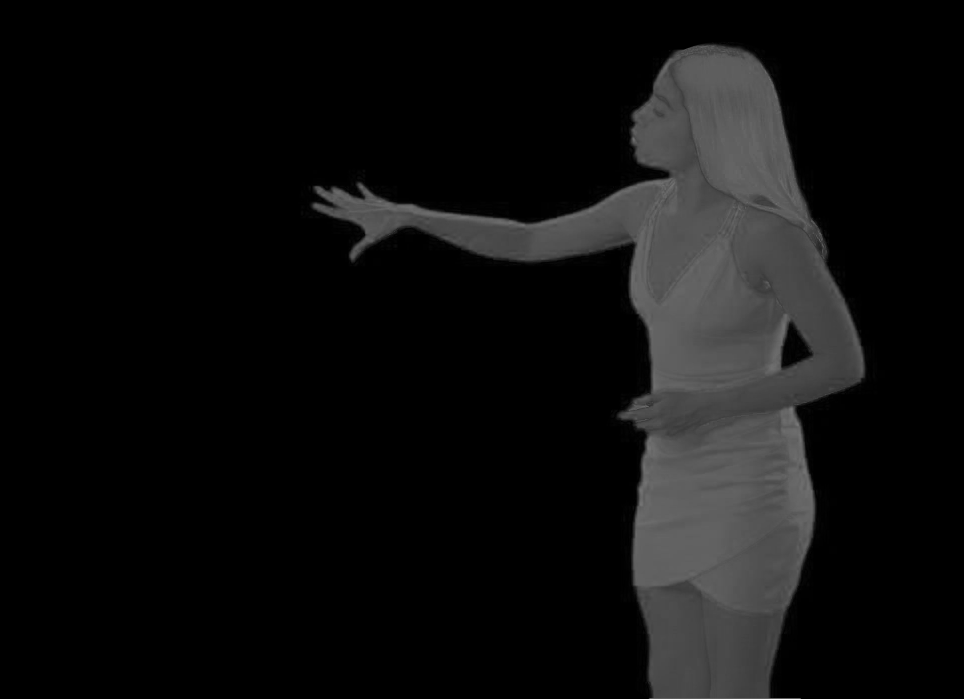

In [100]:
# compute the differences
difference = cv2.absdiff(bg, img)
print(difference.shape)

difference = np.sum(difference, axis=2) / 3.0
difference = difference.astype('uint8')
print(difference.shape)

standard_shape = difference.shape
cv2_imshow(difference)

In [101]:
print(type(standard_shape))

<class 'tuple'>


difference


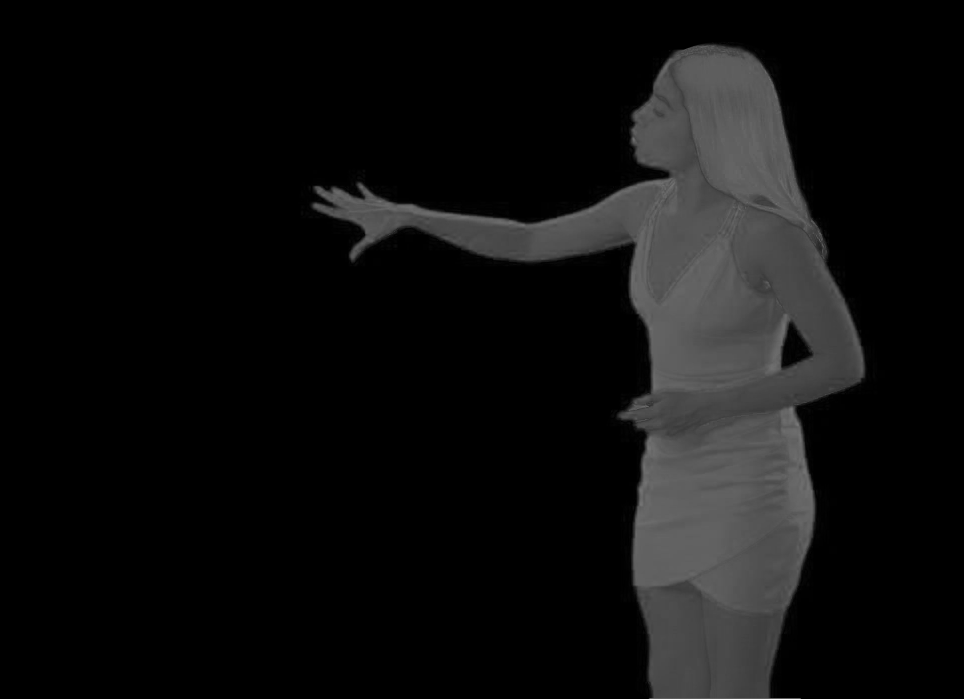

difference_binary


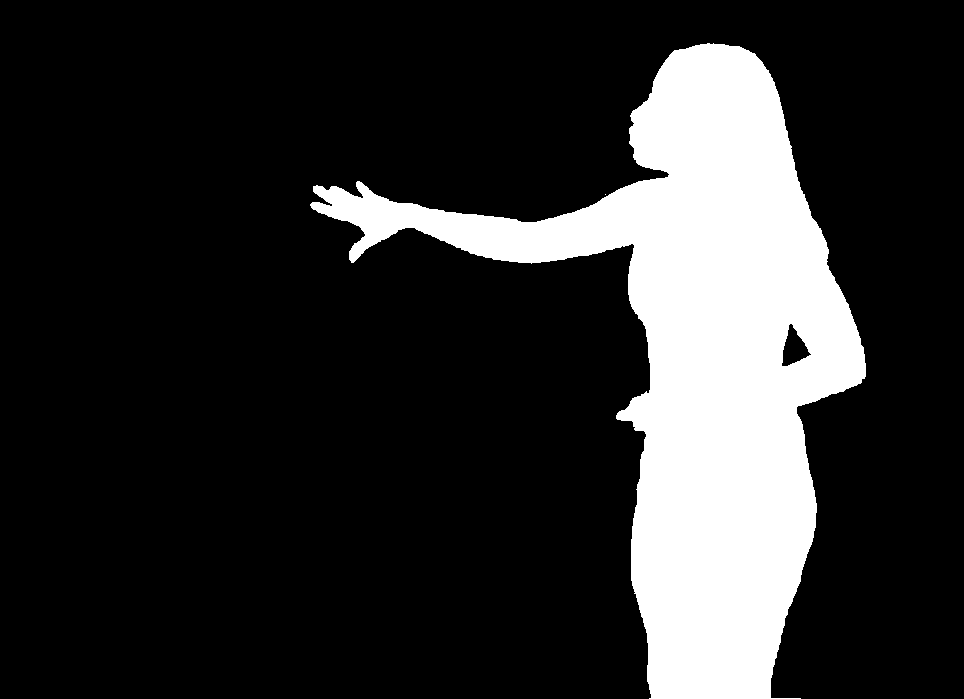

True

In [102]:
# compute binary mask

import numpy as np
import cv2

_, difference_binary = cv2.threshold(difference, 15, 255, cv2.THRESH_BINARY)

print('difference')
cv2_imshow(difference)

print('difference_binary')
cv2_imshow(difference_binary)

cv2.imwrite(base_path + 'difference_binary.png', difference_binary)


In [103]:
from numpy import newaxis

diff_nb = difference_binary[:,:, newaxis]

(495, 880, 3)
(699, 964, 3)


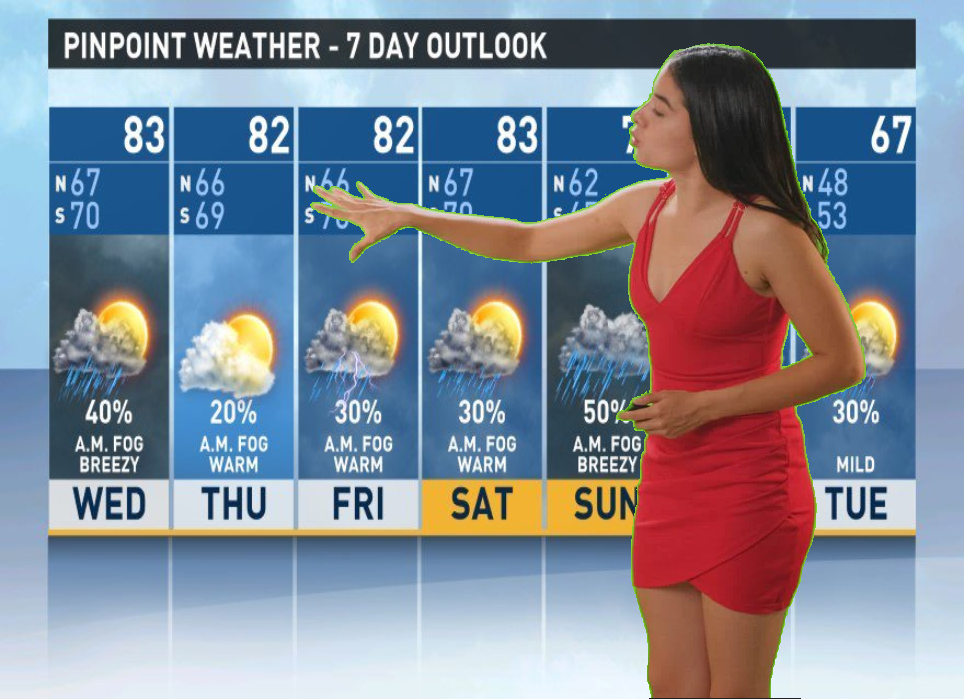

In [104]:
# replace background

new_bg = cv2.imread(base_path + 'weather_forecast.jpg')
print(new_bg.shape)
new_bg = cv2.resize(new_bg, (standard_shape[::-1]))
print(new_bg.shape)

output = np.where(diff_nb == 0, new_bg, img)
cv2_imshow(output)

## HW3

Viết chương trình tìm kiếm **n** ảnh (trong tập fruit datasset) có đặc điểm tương tự với ảnh input nhất. Sử dụng **cosine similarity** để so sánh các ảnh với nhau.

VD:

Input: test image 

Ouput: top **n**=5 ảnh có đặc điểm tương tự như như ảnh test image

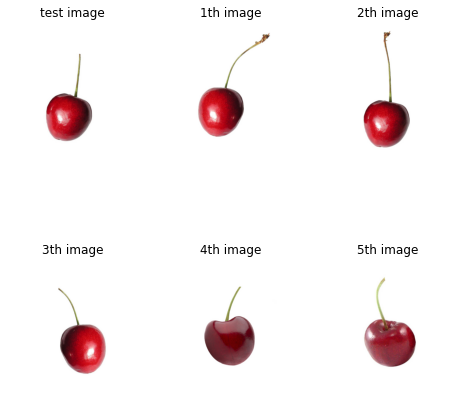

In [105]:
from google.colab import drive

drive.mount('/content/drive/')
hw3_path = '/content/drive/My Drive/Colab Notebooks/AI4O/Exercise8_Data/Exercise8_Data/HW3/fruits/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [106]:
import os
import numpy as np

arr = os.listdir(hw3_path)
print(arr)
print(len(arr))

gray_vector = np.array([0.072, 0.715, 0.213])

['1 (100).jpg', '1 (10).jpg', '1 (1).jpg', '1 (101).jpg', '1 (102).jpg', '1 (104).jpg', '1 (103).jpg', '1 (105).jpg', '1 (106).jpg', '1 (107).jpg', '1 (108).jpg', '1 (109).jpg', '1 (11).jpg', '1 (110).jpg', '1 (111).jpg', '1 (112).jpg', '1 (113).jpg', '1 (114).jpg', '1 (115).jpg', '1 (116).jpg', '1 (117).jpg', '1 (118).jpg', '1 (119).jpg', '1 (12).jpg', '1 (120).jpg', '1 (121).jpg', '1 (122).jpg', '1 (123).jpg', '1 (124).jpg', '1 (125).jpg', '1 (126).jpg', '1 (127).jpg', '1 (128).jpg', '1 (129).jpg', '1 (13).jpg', '1 (130).jpg', '1 (131).jpg', '1 (132).jpg', '1 (133).jpg', '1 (134).jpg', '1 (135).jpg', '1 (136).jpg', '1 (137).jpg', '1 (138).jpg', '1 (139).jpg', '1 (14).jpg', '1 (140).jpg', '1 (141).jpg', '1 (142).jpg', '1 (143).jpg', '1 (144).jpg', '1 (145).jpg', '1 (146).jpg', '1 (147).jpg', '1 (148).jpg', '1 (149).jpg', '1 (15).jpg', '1 (150).jpg', '1 (151).jpg', '1 (152).jpg', '1 (153).jpg', '1 (154).jpg', '1 (155).jpg', '1 (156).jpg', '1 (157).jpg', '1 (158).jpg', '1 (159).jpg', '1

In [107]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


list_grayscale_image = []
for i in range(len(arr)):
  img = cv2.imread('{}1 ({}).jpg'.format(hw3_path, i + 1), 1)
  grayscale_image = img@gray_vector
  list_grayscale_image.append(grayscale_image)

print(list_grayscale_image)

[array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]]), array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]]), array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]]), array([[255., 255., 255., ..., 255., 255., 255.],
       

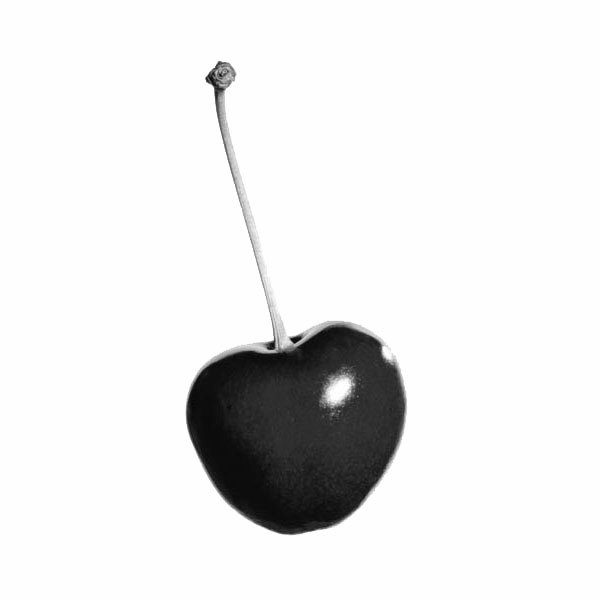

(600, 600)


In [108]:
input_image = cv2.imread('{}1 ({}).jpg'.format(hw3_path, 22), 1)
input_grayscale_img = input_image@gray_vector
cv2_imshow(input_grayscale_img)
print(input_grayscale_img.shape)

In [109]:
def consine_similarity(a, b):
  _a = a.flatten()
  _b = b.flatten()
  return _a.dot(_b) / (np.linalg.norm(_a) * np.linalg.norm(_b))

In [110]:
cos_list = {}
for i, gi in enumerate(list_grayscale_image):
  if(input_grayscale_img.shape == gi.shape):
    cos_list[i + 1] = consine_similarity(input_grayscale_img, gi)

print(cos_list)

{1: 0.9560508245751236, 2: 0.9687354954088783, 4: 0.9727091297356389, 5: 0.9553235268311911, 6: 0.8836097051986134, 7: 0.9628613009638274, 8: 0.9651314083156927, 9: 0.9748669514734203, 10: 0.9629965157510547, 11: 0.9590902382415594, 12: 0.9660533466636707, 13: 0.9703784096353922, 16: 0.9544335732188579, 17: 0.9365072413040748, 18: 0.936051051039566, 19: 0.9184681582131085, 20: 0.9692442877185727, 21: 0.9812706874578445, 22: 1.0, 23: 0.9647852387959043, 24: 0.9642020098637857, 25: 0.9444086802666048, 26: 0.9473752526716374, 27: 0.9346112362376493, 28: 0.9580875602160273, 29: 0.9564981608467976, 30: 0.9678260498520824, 31: 0.9184160131123661, 32: 0.9131150229616386, 33: 0.8923820977477586, 34: 0.9159644912346804, 35: 0.9542300701896246, 36: 0.9617431357055912, 37: 0.9188855494844016, 38: 0.9143878474384207, 39: 0.9657277964496395, 40: 0.9550969797554872, 41: 0.9334045967955859, 42: 0.9202283201912056, 43: 0.8994038613577764, 44: 0.9655260995701762, 45: 0.9704833231205623, 46: 0.974263044

In [111]:
a_rank = sorted(cos_list.items(), key=lambda x: x[1], reverse=True)
a_rank

[(22, 1.0),
 (104, 0.9881428193537714),
 (79, 0.9847094037051287),
 (105, 0.9838800789521678),
 (82, 0.9826800374569865),
 (78, 0.9821089878770329),
 (80, 0.9814143339243776),
 (21, 0.9812706874578445),
 (81, 0.980541069498159),
 (152, 0.9792991067031699),
 (159, 0.9787264263125636),
 (136, 0.9782590956981867),
 (106, 0.9777635194125414),
 (57, 0.9768800538298803),
 (132, 0.9760837847548732),
 (9, 0.9748669514734203),
 (46, 0.9742630442320249),
 (56, 0.9742587227439289),
 (153, 0.9736611168516525),
 (160, 0.9728803138884171),
 (4, 0.9727091297356389),
 (161, 0.9724369012545973),
 (138, 0.9716738200891264),
 (45, 0.9704833231205623),
 (13, 0.9703784096353922),
 (134, 0.9699447333136884),
 (149, 0.9698410689260333),
 (121, 0.9695790396174291),
 (20, 0.9692442877185727),
 (73, 0.9690978770224927),
 (2, 0.9687354954088783),
 (123, 0.9680396338251646),
 (30, 0.9678260498520824),
 (103, 0.9670826852644343),
 (75, 0.96697549231574),
 (151, 0.9663959173768052),
 (97, 0.9662824402301102),
 (119

In [112]:
for i, item in enumerate(a_rank):
  if i <= 15:
    top10_image = cv2.imread('{}1 ({}).jpg'.format(hw3_path, item[0]), 1)
    cv2_imshow(top10_image)

Output hidden; open in https://colab.research.google.com to view.

## HW4

Viết một function trả về disparity map từ 2 ảnh đầu vào (left và right image) dựa trên các stereo matching algorithm sau:
- SAD (Sum of Absolute Differences)
- SSD (Sum of Squred Differences)
- Cosine similarity 

Input: left image, right image, maximum disparity (chính là range d trong bài giảng, là khoảng cách mà window sẽ trượt trên một ảnh để so sánh độ tương đồng với vùng của ảnh còn lại), windown size và tên thuật toán

Output: Disparity map 

- Khi tăng windown size thì việc gì sẽ xảy ra?
- Kết quả của SAD và SSD có gì khác nhau?


Ảnh dưới là ví dụ ouput khi dùng SSD

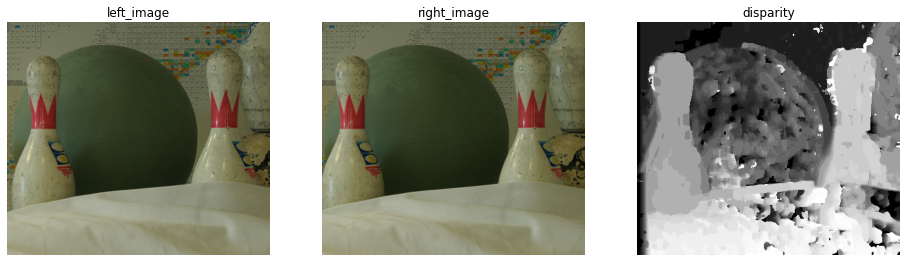

Thuật toán của stereo matching:

$d_p =  \underset{d \in D}{\mathrm{argmax}}(C(p,q))$

$q = (x_p - d, y_p)$

- **SAD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}|L(u)-R(v)|$ 

- **SSD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}(L(u)-R(v))^2$ 

- **Cosine similarity**: $C(p,q) =  cs(W_p, W_q)$ 

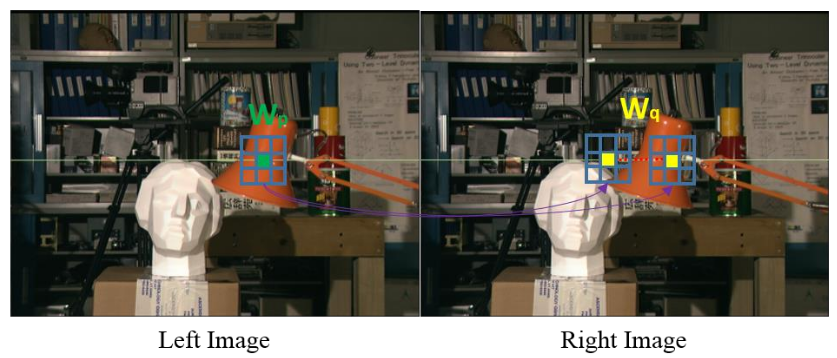

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/AI4O/Exercise8_Data/Exercise8_Data/HW4/left.png


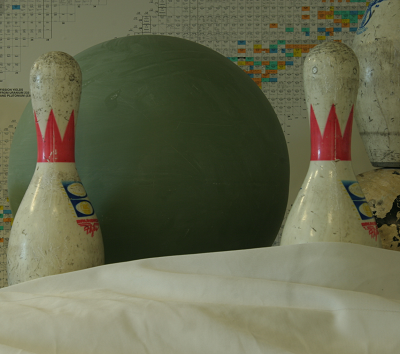

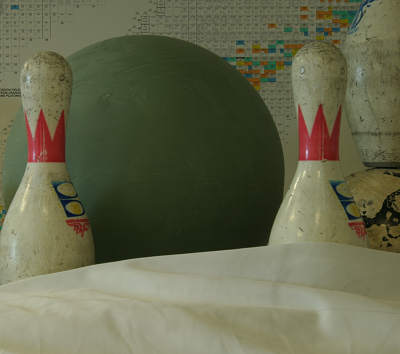

In [17]:
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive/')
hw4_path = '/content/drive/My Drive/Colab Notebooks/AI4O/Exercise8_Data/Exercise8_Data/HW4/'

left_image_path = hw4_path + 'left.png'
right_image_path = hw4_path + 'right.png'

print(left_image_path)
left = cv2.imread(left_image_path, 1)
cv2_imshow(left)

right = cv2.imread(right_image_path, 1)
cv2_imshow(right)

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline
# np.seterr(over='ignore')


def preprocess_frame(path):
  orig_image = cv2.imread(path)
  gray_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
  image = cv2.equalizeHist(gray_image)
  image = cv2.GaussianBlur(image, (5, 5), 0)
  return orig_image, image

def calc_disparity_matrix(left_img_path, right_img_path, max_disparity, window_size, algo_name):
  orig_left_image, left_image = preprocess_frame(left_img_path)
  orig_right_image, right_image = preprocess_frame(right_img_path)
  kernel = np.ones([window_size, window_size]) / window_size

  # cv2_imshow(left_image)
  # cv2_imshow(right_image)

  disparity_maps = np.zeros([left_image.shape[0], left_image.shape[1], max_disparity])

  for d in range(0, max_disparity):
    translation_matrix = np.float32([[1, 0, d], [0, 1, 0]])
    shifted_image = cv2.warpAffine(right_image, translation_matrix, 
                                   (right_image.shape[1], right_image.shape[0]))
    
    if algo_name == 'SAD':
      SAD = abs(np.float32(left_image) - np.float32(shifted_image))
      filtered_image = cv2.filter2D(SAD, -1, kernel)
    elif algo_name == 'SSD':
      SSD = np.float32(left_image) - np.float32(shifted_image)
      SSD = SSD ** 2
      filtered_image = cv2.filter2D(SSD, -1, kernel)
    elif algo_name == 'Cosine similarity':
      mltiplied_matrix = np.float32(left_image) * np.float32(shifted_image)
      numerator = cv2.filter2D(mltiplied_matrix, -1, kernel)

      square_norm_left = cv2.filter2D(np.float32(left_image) ** 2, -1, kernel)
      square_norm_shifted = cv2.filter2D(np.float32(shifted_image) ** 2, -1, kernel)
      denominator = np.sqrt(square_norm_left ** square_norm_shifted) + 1e-6
      filtered_image = numerator / denominator
    else: 
      raise Exception('Wrong Algorithm')

    disparity_maps[:, :, d] = filtered_image

  if algo_name == 'Cosine similarity':
    disparity = np.argmax(disparity_maps, axis=2)
    # with np.errstate(divide='ignore'):
    disparity = np.uint8(disparity * 255 / maximum_disparity)
    disparity = cv2.equalizeHist(disparity)
    print('disparity', disparity)
  else: 
    disparity = np.argmin(disparity_maps, axis=2)
    disparity = np.uint8(disparity * 255 / maximum_disparity)
    disparity = cv2.equalizeHist(disparity)
  return orig_left_image, orig_right_image, disparity



In [23]:
def show_plt(orig_left_image, orig_right_image, disparity):
  fig = plt.figure(figsize = (16, 12))
  fig.add_subplot(1, 3, 1)
  plt.title('left_image')
  plt.imshow(orig_left_image[...,::-1])

  fig.add_subplot(1, 3, 2)
  plt.title('right_image')
  plt.imshow(orig_right_image[...,::-1])

  fig.add_subplot(1, 3, 3)
  plt.title('disparity')
  plt.imshow(disparity, cmap='gray', vmin=0, vmax=255)

  plt.show()

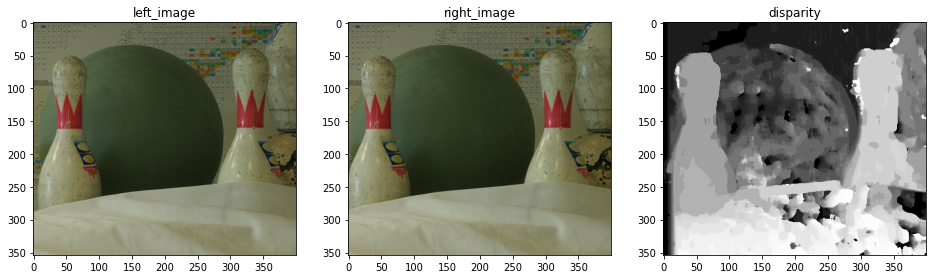

In [41]:

maximum_disparity = 64
window_size = 12


algo = 'SAD'
orig_left_image, orig_right_image, disparity = calc_disparity_matrix(left_image_path, right_image_path, maximum_disparity, window_size, algo)
show_plt(orig_left_image, orig_right_image, disparity)




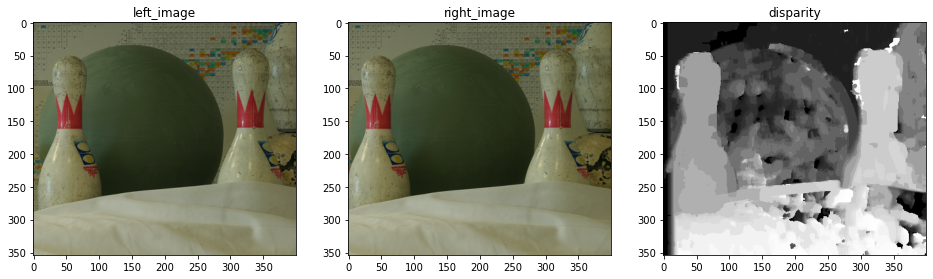

In [40]:

algo = 'SSD'
orig_left_image, orig_right_image, disparity = calc_disparity_matrix(left_image_path, right_image_path, maximum_disparity, window_size, algo)
show_plt(orig_left_image, orig_right_image, disparity)

disparity [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [239 229   0 ...   0   0   0]
 [232 245 255 ...   0   0   0]
 [239   0   0 ...   0   0   0]]


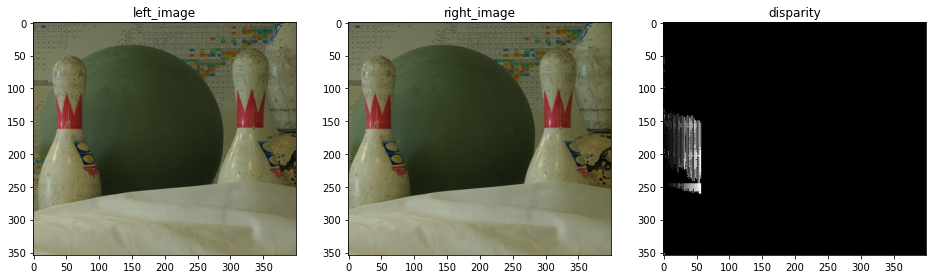

In [46]:
algo = 'Cosine similarity'
orig_left_image, orig_right_image, disparity = calc_disparity_matrix(left_image_path, right_image_path, maximum_disparity, window_size, algo)
show_plt(orig_left_image, orig_right_image, disparity)